In [50]:
import numpy as np
from matplotlib import pyplot as plt
import qutip as qutip
import time as time
from scipy import special

import sys
sys.path.append('../../utils')

from tomography import coherent_state_tomography_copy as cst2
from visualization import state_visualization as state_vis
from math_utils import statistics_utils as su

In [3]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [88]:
# System parameters
max_x = 4
mesh_size = 0.5
dim = 40

efficiency = 0.75

In [89]:
# State definitions
pure_signal_state = (qutip.basis(dim, 0) + qutip.basis(dim, 1)).unit()
pure_signal_dm = pure_signal_state * pure_signal_state.dag()
photon_loss_dm = qutip.Qobj(cst2.bernoulli_transform(pure_signal_dm, efficiency, dim))

In [91]:
# Define the POVM
s = time.time()

# Generate the ideal POVM
ideal_povm, alphas, xs, ps = cst2.generate_coherent_state_POVM(max_x, mesh_size, dim)

# Deform the POVM elements by Bernoulli transforms
# photon_loss_povm = cst2.povm_bernoulli_transform(ideal_povm, efficiency, dim)
photon_loss_povm = cst2.fast_povm_bernoulli_transform(ideal_povm, efficiency, dim)
e = time.time()
print('Generating coherent state POVM took: ' + str(e - s) + ' s')

Generating coherent state POVM took: 1.6619269847869873 s


In [92]:
# Define q functions
photon_loss_qfunc = qutip.qfunc(photon_loss_dm, xs, ps, g=2)

In [93]:
# Do the photon loss MLE
number_of_mle_iterations = 1000
s = time.time()
reconstructed_ideal_state, ideal_lls = \
    cst2.perform_coherent_state_MLE(
        photon_loss_povm,
        photon_loss_qfunc, 
        number_of_mle_iterations,
        frequency_threshold=0,
        cutoff=0,
        identity_mixin=0,
        rho0=reconstructed_ideal_state)
e = time.time()
print('Time for MLE reconstruction for dim = ' + str(dim) + ': ' + str(e - s) + ' s')

Time for MLE reconstruction for dim = 40: 100.90305685997009 s


<IPython.core.display.Javascript object>


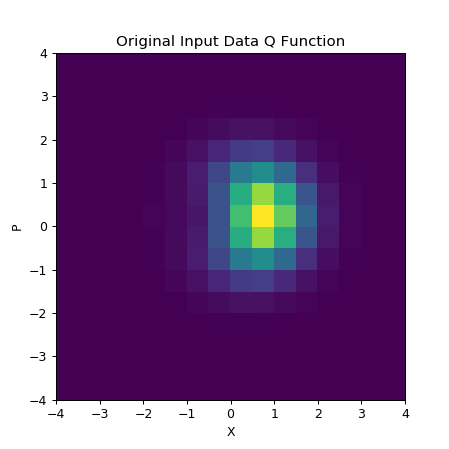

<IPython.core.display.Javascript object>


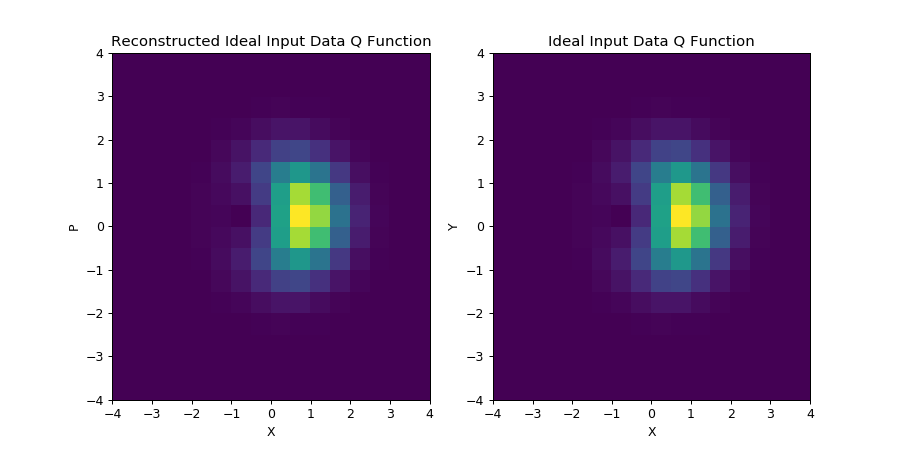

<IPython.core.display.Javascript object>


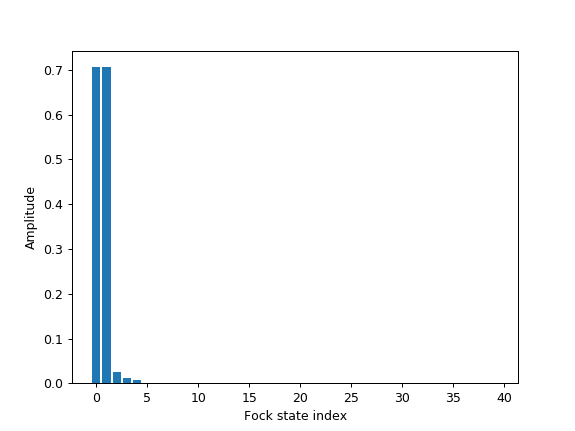

In [94]:
cst2.plot_coherent_state_tomography_Q_functions(photon_loss_qfunc,
                                               reconstructed_ideal_state,
                                               xs,
                                               ps,
                                               ideal_state=pure_signal_dm)

In [35]:
# Do ideal MLE on the Bernoulli transformed state
number_of_mle_iterations = 300
s = time.time()
reconstructed_photon_loss_state, ideal_lls = \
    cst2.perform_coherent_state_MLE(
        ideal_povm,
        photon_loss_qfunc, 
        number_of_mle_iterations,
        frequency_threshold=0,
        cutoff=0,
        identity_mixin=0)
e = time.time()
print('Time for MLE reconstruction for dim = ' + str(dim) + ': ' + str(e - s) + ' s')

Time for MLE reconstruction for dim = 40: 30.38286304473877 s


<IPython.core.display.Javascript object>


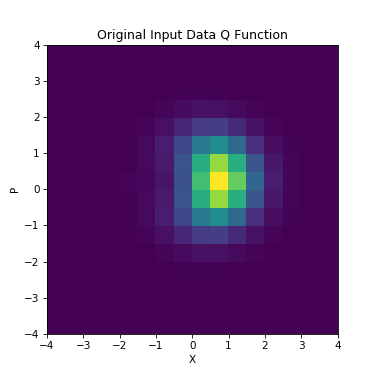

<IPython.core.display.Javascript object>


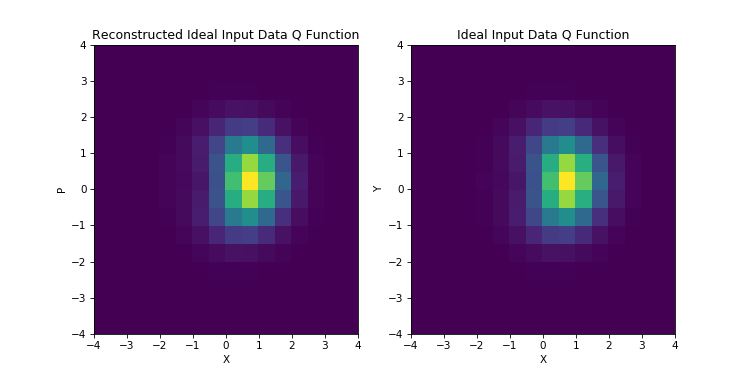

<IPython.core.display.Javascript object>


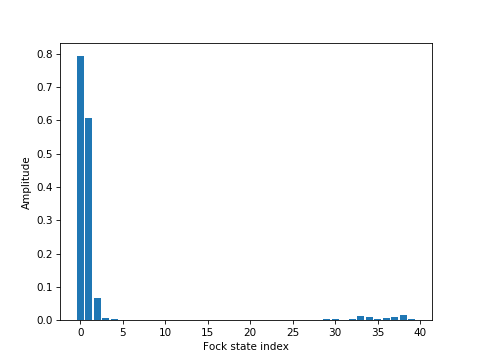

In [36]:
cst2.plot_coherent_state_tomography_Q_functions(photon_loss_qfunc,
                                               reconstructed_photon_loss_state,
                                               xs,
                                               ps,
                                               ideal_state=photon_loss_dm)

In [68]:
photon_loss_povm[0][0].isherm
max_lost_photons = dim

# Generate necessary combinatoric values
B_numbers = np.zeros((dim + max_lost_photons, dim + max_lost_photons))
for i, _ in enumerate(B_numbers):
    for j, _ in enumerate(B_numbers[0]):
        B_numbers[i][j] = special.comb(i, j)



In [85]:
print(photon_loss_povm[0][0][28][0][30])
print(photon_loss_povm[0][0][30][0][28])




0.005012580127411633j
-0.005012580127411633j
